# **Dependencies Install**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

#**Skewness of Dataset**

In [ ]:
cnt = {}
df = pd.read_csv('/content/drive/MyDrive/Projects/MTP Project/900_data - We_gpt.csv')
# df = pd.read_csv('/content/900_data - We_gpt.csv')
df.head()

,Sheet,Full Complaint,Domain,Complaint/Non Complaint,Aspect 1,Aspect 2,Aspect 3
0,Voxya,Me and my sister got treatments from White den...,NaN,1,Accusation,Service,NaN
1,Voxya,I have booked a diagnostic service on Netmeds....,NaN,1,Billing,NaN,NaN
2,Voxya,"This is in regard to my ** year old Dad, Mr Ja...",NaN,1,Service,NaN,NaN
3,Voxya,"It is related to my fathers treatment, rather ...",NaN,1,Behaviour,NaN,NaN
4,Voxya,In the initial conversation with Dr. Amrutha o...,NaN,1,Billing,Service,NaN


In [ ]:
non_complaint = (df['Complaint/Non Complaint'] == 0).sum()

print("Total Dataset: ", len(df))
print(f"Number of Complaints are {len(df) - non_complaint}")
print(f"Number of non complaints are {non_complaint}")

Total Dataset:  876
Number of Complaints are 480
Number of non complaints are 396


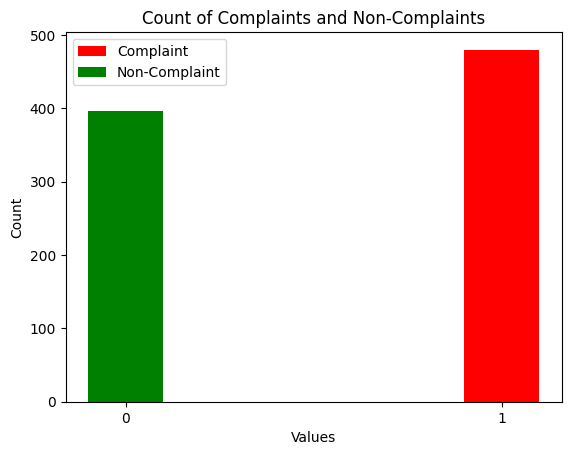

In [ ]:
value_counts = df['Complaint/Non Complaint'].value_counts()
bar_width =0.2
plt.bar(value_counts.index, value_counts.values, color=['Red', 'Green'], label=['Complaint', 'Non-Complaint'], width=bar_width)
plt.xlabel('Values')
plt.ylabel('Count')
plt.title('Count of Complaints and Non-Complaints')
plt.xticks([0, 1])
plt.legend()
plt.show()

In [ ]:
print(value_counts.index, value_counts.values)

Int64Index([1, 0], dtype='int64') [480 396]


# **Number of words Analysis**

In [ ]:
pip install nltk


In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string

nltk.download('punkt')
nltk.download('stopwords')

def clean_and_count_words(text):
    tokens = word_tokenize(text)

    table = str.maketrans('', '', string.punctuation)
    words = [word.lower() for word in tokens if word.isalpha()]
    words = [word.translate(table) for word in words]

    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    word_count = len(words)

    return word_count



# Apply the clean_and_count_words function to the 'review' column
df['word_count'] = df['Full Complaint'].apply(clean_and_count_words)

# Display the DataFrame with word counts
print(df)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


     Sheet                                     Full Complaint Domain  \
0    Voxya  Me and my sister got treatments from White den...    NaN   
1    Voxya  I have booked a diagnostic service on Netmeds....    NaN   
2    Voxya  This is in regard to my ** year old Dad, Mr Ja...    NaN   
3    Voxya  It is related to my fathers treatment, rather ...    NaN   
4    Voxya  In the initial conversation with Dr. Amrutha o...    NaN   
..     ...                                                ...    ...   
871    NaN  Seamless Coordination Between Departments\n\nT...    NaN   
872    NaN  I recently had the pleasure of undergoing a de...    NaN   
873    NaN  Starting with the seamless payment process, I ...    NaN   
874    NaN  I appreciate the efficient handling of the ent...    NaN   
875    NaN  he aftercare and follow-up appointments were s...    NaN   

     Complaint/Non Complaint             Aspect 1 Aspect 2 Aspect 3  \
0                          1           Accusation  Service      

In [ ]:
short_reviews = df[df['word_count'] < 80]
short_reviews = short_reviews.reset_index(drop=True)

In [ ]:
short_reviews.head()

,Sheet,Full Complaint,Domain,Complaint/Non Complaint,Aspect 1,Aspect 2,Aspect 3,word_count
0,Voxya,Me and my sister got treatments from White den...,NaN,1,Accusation,Service,NaN,67
1,Voxya,I have booked a diagnostic service on Netmeds....,NaN,1,Billing,NaN,NaN,39
2,Voxya,In the initial conversation with Dr. Amrutha o...,NaN,1,Billing,Service,NaN,40
3,Voxya,We got blood test done for my wife in the morn...,NaN,1,Time,NaN,NaN,35
4,Voxya,I have taken a premium called Star Women Polic...,NaN,1,Billing,NaN,NaN,49


In [ ]:
non_complaint = (short_reviews['Complaint/Non Complaint'] == 0).sum()

print("Total Dataset of Short Reviews: ", len(short_reviews))
print(f"Number of Complaints are {len(short_reviews) - non_complaint}")
print(f"Number of non complaints are {non_complaint}")

Total Dataset of Short Reviews:  771
Number of Complaints are 403
Number of non complaints are 368


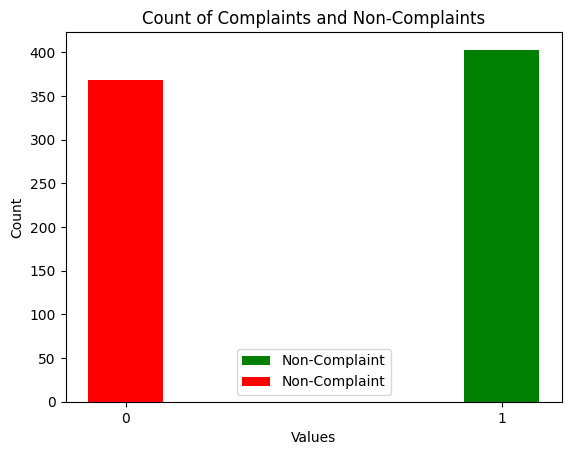

In [ ]:
value_counts = short_reviews['Complaint/Non Complaint'].value_counts()
bar_width =0.2
plt.bar(value_counts.index, value_counts.values, color=['Green', 'Red'], label=['Non-Complaint', 'Non-Complaint'], width=bar_width)
plt.xlabel('Values')
plt.ylabel('Count')
plt.title('Count of Complaints and Non-Complaints')
plt.xticks([0, 1])
plt.legend()
plt.show()

In [ ]:
print(value_counts.index, value_counts.values)

Int64Index([1, 0], dtype='int64') [403 368]


# **Falcon Model Loading**

In [ ]:
!pip install peft
!pip install accelerate
!pip install bitsandbytes
!pip install --upgrade transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.3/168.3 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 270.9/270.9 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.0/105.0 MB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 11.4 MB/s eta 0:00:00
  Attempting uninstall: transformers
    Found existing installation: transformers 4.35.2
    Uninstalling transformers-4.35.2:
      Successfully uninstalled transformers-4.35.2


In [ ]:
import torch
from transformers import AutoTokenizer, AutoModelForCausalLM, BitsAndBytesConfig

model_name = "tiiuae/falcon-7b-instruct"

compute_dtype = getattr(torch, "float16")

bnb_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_quant_type="nf4",
    bnb_4bit_compute_dtype=compute_dtype,
    bnb_4bit_use_double_quant=False,
)

In [ ]:
model = AutoModelForCausalLM.from_pretrained(
    model_name,
    device_map="auto",
    quantization_config=bnb_config,
)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.05k [00:00<?, ?B/s]

pytorch_model.bin.index.json:   0%|          | 0.00/16.9k [00:00<?, ?B/s]

pytorch_model-00001-of-00002.bin:   0%|          | 0.00/9.95G [00:00<?, ?B/s]

pytorch_model-00002-of-00002.bin:   0%|          | 0.00/4.48G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


generation_config.json:   0%|          | 0.00/117 [00:00<?, ?B/s]

In [ ]:
model.config.use_cache = False
model.config.pretraining_tp = 1

tokenizer = AutoTokenizer.from_pretrained(model_name,
                                          trust_remote_code=True,
                                         )
tokenizer.pad_token = tokenizer.eos_token
tokenizer.padding_side = "left"

tokenizer_config.json:   0%|          | 0.00/287 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.73M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/281 [00:00<?, ?B/s]

In [ ]:
generation_config = model.generation_config
generation_config.max_new_tokens = 10 #Avg length of Answer of input
generation_config.temperature = 0.08
generation_config.top_p = 0.7
generation_config.num_return_sequences = 1
generation_config.pad_token_id = tokenizer.eos_token_id
generation_config.eos_token_id = tokenizer.eos_token_id
generation_config.do_sample = True  # Adjust based on your preference for sampling

In [ ]:
from transformers import StoppingCriteria, StoppingCriteriaList

class StopOnTokens(StoppingCriteria):
    def __call__(self, input_ids: torch.LongTensor, scores: torch.FloatTensor, **kwargs) -> bool:
        stop_ids = 2996
        if ']' in tokenizer.decode(input_ids[0][-1]):
          return True
        return False

In [ ]:
non_comp = short_reviews[short_reviews['Complaint/Non Complaint']==0]
non_comp = non_comp.reset_index(drop=True)
print("Total number of Non Complaints :", len(non_comp))

Total number of Non Complaints : 368


In [ ]:
non_comp['Full Complaint'][0]

'I ordered an **g protein shake pack of four and received a defective spilling product. After opening the package i found out that the entire packing was leaking from inside and it also spilled on some important papers of mine kept on the table. i called the company and mailed them the issue along with relevant pictures and videos for prompt redressal but no response received from the company. I was always told to wait for ** hours or ** hours and a name of few customer support executives were Mr. Ashutosh and Ms. Kiran. Whenever I called, they told me t send more pictures and videos which is not possible for me because the products are getting so bad day by day that it smells a lot and my entire house is smelling very badly.\n \n My order number is HKM-*************\n \n This is the Ticket No:************ for the complaint e-mail.'

# **Zero Shot Binary Classification**

In [ ]:
prediction = []
i=0

for review in short_reviews['Full Complaint']:
  # %%time
  device = "cuda:0"

  prompt = f"""Your task is to classify text.

        Choose the label among the following possibilities with the highest probability.
        Only return the label, nothing more:

        'Complaint', 'Non-Complaint'

        For this task, consider the reviews apart from heathcare domain as indicative of 'Non-Complaint.'

        The text to classify:
        ```
        {review}
        ```

        Your response:
        """.strip()


  encoding = tokenizer(prompt, return_tensors="pt").to(device)
  with torch.inference_mode():
    outputs = model.generate(
        input_ids = encoding.input_ids,
        attention_mask = encoding.attention_mask,
        generation_config = generation_config,
        num_return_sequences=1  # Set this to 1
    )

  predict = tokenizer.decode(outputs[0], skip_special_tokens=True)
  # print(predict)
  response_index = predict.find("Your response:")
  response_label = predict[response_index + len("Your response:"):].strip()
  prediction.append(response_label)
  i=i+1
  print(i)
  print(response_label)

1
'Complaint'
2
```
        Non-Complaint
        ```
3
```
        Non-Complaint
        ```
4
'Non-Complaint'
5
'Non-Complaint'
6
'Non-Complaint'
7
'Non-Complaint'
8
```
        Non-Complaint
        ```
9
'Non-Complaint'
10
'Non-Complaint'

The
11
'Non-Complaint'
12
'Non-Complaint'
13
'Non-Complaint'
14
'Non-Complaint'
15
'Complaint'

        The text to classify
16
'Non-Complaint'

        The text
17
```
        Non-Complaint
        ```
18
```
        Non-Complaint
        ```
19
'Non-Complaint'
20
The label to be classified is 'Non
21
'Non-Complaint'
22
I understand your concern and would like to assure
23
'Non-Complaint'

The
24
The label to classify the text is '
25
'Non-Complaint'
26
```
        Non-Complaint
        ```
27
'Non-Complaint'
28
```
        Non-Complaint
        ```
29
```
        Non-Complaint
        ```
30
I understand your frustration and would like to help
31
```
        Non-Complaint
        ```
32
'Non-Complaint'
33
```
        Non-Complaint
        ```
3

In [ ]:
short_reviews['Full Complaint'][58]

"My name was selected for KBC ghar baithe jeeto jackpot contest and i have won * lakh rs on *th of october ****. In this regard I got a call from KBC also and so I know it's not fake and my name was Telecasted on sony tv on * October.I got a email from apollo *** to share my details. So even after sharing all the details why is it taking so long to transfer the winning amount? It's been oven * and half month now."

In [ ]:
prediction = [pre.split()[-1] for pre in prediction]

In [ ]:
prediction[1]

'```'

In [ ]:
pre_result = [0 if cls == "'Non-Complaint'" else 1 for cls in prediction]

In [ ]:
pre_result[1]

1

In [ ]:
conf_matrix = confusion_matrix(short_reviews['Complaint/Non Complaint'], pre_result)
accuracy = accuracy_score(short_reviews['Complaint/Non Complaint'], pre_result)
precision = precision_score(short_reviews['Complaint/Non Complaint'], pre_result)
recall = recall_score(short_reviews['Complaint/Non Complaint'], pre_result)
f1 = f1_score(short_reviews['Complaint/Non Complaint'], pre_result)

# Display the confusion matrix and performance metrics
print("Confusion Matrix:")
print(conf_matrix)
print("\nAccuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Confusion Matrix:
[[176 192]
 [230 173]]

Accuracy: 0.45265888456549935
Precision: 0.473972602739726
Recall: 0.4292803970223325
F1 Score: 0.4505208333333333


# **Few Shot Binary Classification**

In [ ]:
prediction_f = []
i=0

for review in short_reviews['Full Complaint']:
  # %%time
  device = "cuda:0"

  prompt = f"""Your task is to classify text.

  Choose the label among the following possibilities with the highest probability.
  Only return the label, no punctuations and nothing more:

  'Complaint', 'Non-Complaint'

  For this task, consider the reviews apart from heathcare domain as indicative of 'Non-Complaint'.

  For Example:

  <Example> : Dear Sir /madam,
  I am a employee at EENADU journalism college and my wife is admitted at ESIC Nacharam, Hyderabad with a bone breakage in the right elbow on
  Saturday evening 22/04/2023 and the condition of the hospital is worst everywhere human waste and employees not taking care of patients there is
  no proper response from doctors and today is Wednesday but there is no progress can you please have look into the issue asap
  <Your Response> : Complaint

  <Example> : Good morning sir we are living in chennai ramapuram here nearby miot hospital ramapuram road mgr house road there is one wine shop and
  more than 20 infected dogs biting and barking everyone in evening 7to10 time people's get troubled and afraid to come that side kindly please
  solve this issue. Women's and childrens were there already we get troubling by drunken guys
  <Your Response> : Non-Complaint

  <Example> : In this hospital every security guard have rode behaviour and Medicine distribution section both the employee have very slow around 100
  people in line but the employee have no problem with this I am in standing in medicine line 10 am and now 1 pm but still waiting for my madicine,
  I m specially upset for many people in line for her medicine but the employee still work very slowly now what can we do this problem in ranchi main hospital"
  <Your Response> : Complaint

  <Example> : I would like to have the contact number of dr dhaval darji from pediatric department contact number since he works and owns a rented hospital in
  jogehswari named anand hospital.
  <Your Response> : Non-Complaint


  The text to classify::
  ```
  {review}
  ```

  Your response:
  """.strip()



  encoding = tokenizer(prompt, return_tensors="pt").to(device)
  with torch.inference_mode():
    outputs = model.generate(
        input_ids = encoding.input_ids,
        attention_mask = encoding.attention_mask,
        generation_config = generation_config,
        num_return_sequences=1  # Set this to 1
    )

  predict = tokenizer.decode(outputs[0], skip_special_tokens=True)
  # print(predict)
  response_index = predict.find("Your response:")
  response_label = predict[response_index + len("Your response:"):].strip()
  prediction_f.append(response_label)
  i=i+1
  print(i)
  print(response_label)

1
`Complaint`
2
<Your Response>

The text to
3
"Non-Complaint"
4
<Your Response>

The text to
5
"Non-Complaint"
6
`Non-Complaint`
7
"Non-Complaint"
8
```
  Complaint
  ```

The
9
`Complaint`

The text to
10
`Complaint`
11
```
  Complaint
  ```

The
12
<Your Response>

The text to
13
`Complaint`
14
"Complaint"
15
`Complaint`
16
`Non-Complaint`
17
`Non-Complaint`
18
`Complaint`
19
`Complaint`

The text to
20
"Non-Complaint"
21
"Non-Complaint"
22
"Non-Complaint"
23
`Complaint`

The text to
24
I am sorry, I am not able
25
`Complaint`
26
```
  Non-Complaint
  ```
27
"Non-Complaint"
28
```
  Non-Complaint
  ```
29
```
  Non-Complaint
  ```
30
"Non-Complaint"
31
```
  Complaint
  ```

The
32
<Your Response>
33
`Complaint`
34
"I am sorry to hear that you had
35
"Non-Complaint"
36
`Non-Complaint`
37
`Non-Complaint`
38
<code>Complaint</code>
39
<Your Response>

The label
40
<Your Response>

The text to
41
"Non-Complaint"
42
`Complaint`
43
"Non-Complaint"
44
"I am sorry to hear about your experie

In [ ]:
prediction_f = [pre.split()[-1] for pre in prediction_f]

In [ ]:
pre_result_f = [0 if cls == "'Non-Complaint'" else 1 for cls in prediction_f]

In [ ]:
conf_matrix_f = confusion_matrix(short_reviews['Complaint/Non Complaint'], pre_result_f)
accuracy_f = accuracy_score(short_reviews['Complaint/Non Complaint'], pre_result_f)
precision_f = precision_score(short_reviews['Complaint/Non Complaint'], pre_result_f)
recall_f = recall_score(short_reviews['Complaint/Non Complaint'], pre_result_f)
f1_f = f1_score(short_reviews['Complaint/Non Complaint'], pre_result_f)

# Display the confusion matrix and performance metrics
print("Confusion Matrix:")
print(conf_matrix_f)
print("\nAccuracy:", accuracy_f)
print("Precision:", precision_f)
print("Recall:", recall_f)
print("F1 Score:", f1_f)

Confusion Matrix:
[[  0 368]
 [  0 403]]

Accuracy: 0.522697795071336
Precision: 0.522697795071336
Recall: 1.0
F1 Score: 0.6865417376490631


# **Prediction Analysis**

In [ ]:
short_reviews['Predictions'] = pre_result       # pre_results_f  for few shot, pre_result for zero shot

short_non_complaint = (short_reviews['Predictions'] == 0).sum()

print("Total Dataset: ", len(short_reviews))
print(f"Number of Complaints are {len(short_reviews) - short_non_complaint}")
print(f"Number of non complaints are {short_non_complaint}")

Total Dataset:  771
Number of Complaints are 365
Number of non complaints are 406


In [ ]:
#segregating only predicted complaints from the dataset

aspect_df = short_reviews[short_reviews['Predictions'] == 1]

# **Aspect class Zero Shot**


In [ ]:
aspect_pred = []
i=0

for review in aspect_df['Full Complaint']:
  # %%time
  device = "cuda:0"

  prompt = f"""Your task is to classify text.
        Choose one or more labels among the following possibilities with the highest probability.
        Only return the label(s), nothing more:

        'Billing', 'Negligence', 'Behaviour', 'Service', 'Time', 'Shortage', 'Accusation', 'Dispute', 'Dirty', 'Online', 'Pharmacy', 'Product'

        The text to classify:
        {review}

        Your response:[
        """.strip()


  encoding = tokenizer(prompt, return_tensors="pt").to(device)
  with torch.inference_mode():
    outputs = model.generate(
        input_ids = encoding.input_ids,
        attention_mask = encoding.attention_mask,
        generation_config = generation_config,
        num_return_sequences=1,  # Set this to 1

        stopping_criteria=StoppingCriteriaList([StopOnTokens()])
        )

  predict = tokenizer.decode(outputs[0], skip_special_tokens=True)
  # print(predict)
  response_index = predict.find("Your response:")
  response_label = predict[response_index + len("Your response:"):].strip()
  aspect_pred.append(response_label)
  i=i+1
  print(i)
  print(response_label)

1
I am sorry to hear about the negative
2
I'm sorry to hear about your experience
3
I understand that you are in a difficult situation
4
I am sorry to hear about the issue with
5
The text to classify:

I
6
The text contains a mix of labels and a
7
I am sorry to hear about your experience
8
The text is related to billing and registration.
9
The text can be classified as 'B
10
Based on the text provided, the most
11
I understand your concern and I will look into
12
The text can be classified as '
13
The text can be classified as '
14
The text is classified as 'Accus
15
I'm sorry to hear that you'
16
The text can be classified as 'B
17
I am sorry to hear about your situation
18
The text is about a successful transaction and payment
19
The text contains the word 'OGCT
20
I am sorry to hear that you are still
21
HealthMug's customer care is not
22
I understand your frustration and I apologize for the
23
The text is related to the purchase of a
24
We understand your frustration and would lik

KeyboardInterrupt: 

# **Aspect class few Shot**

In [ ]:
aspect_pred_f = []
i=0

for review in aspect_df['Full Complaint']:
  # %%time
  device = "cuda:0"

  prompt = f"""Your task is to classify text.
        Choose one or more labels among the following possibilities with the highest probability.
        Only return the label(s), nothing more:

        'Billing', 'Negligence', 'Behaviour', 'Service', 'Time', 'Shortage', 'Accusation', 'Dispute', 'Dirty', 'Online', 'Pharmacy', 'Product'


        For Example:

        <Example> : I have booked a diagnostic service on Netmeds.com on Sept ** Order ID=DIAG************* and paid *** rupees from my netbanking which was debited but the order didinot created or acknowledge thorugh email or sms. No one even bothered to call for the service not provided for the lab. Also, despite of repeated emails and ** calls still didnot got refund for same. Please check and help to get my money back. Thanks
        <Your Response> : [Billing]

        <Example> : In the initial conversation with Dr. Amrutha on a video call I particularly asked about IPR where I was told that toothsi aligners are easy like wearing a specs. However after the payment was done I was told about IPR. Now I am in my last trimester of my pregnancy and suffering from perforation as there is a hole in my ear drum, which needs to be operated post my delivery. I am asking for the refund but they are denying and disconnecting my calls. They are literally harassing me mentally.
        <Your Response> : [Billing, Service]

        <Example> : I have ordered my protein whey *.* kg on dated **/**/****. And still my product not dispatched from their stores. I had tried to contact more than ** times through calls and mails but their reply was not satisfactory at all. Now they have stopped attending my mails. This is very pathetic service by my protein India
        <Your Response> : [Time, Behaviour]

        <Example> : Dear sir, I have placed order on Medi*all.Com.Order #MA****** and MA****** was placed on July **, **** but my order not delivered.i had made payment through credit card. Order related to infant formula milk similar advance stage *.I need my order on urgent basis. They are not dispatching my order nor refund my money.. I am unable to communicate them. They are not over contact number Or email address. How are these people even trading. Terrible service. Not respond over email and contact. Please do the needful as soon as possible
        <Your Response> : [Online, Time]


        The text to classify:
        ```
        {review}
        ```

        Your response: [
        """.strip()



  encoding = tokenizer(prompt, return_tensors="pt").to(device)
  with torch.inference_mode():
    outputs = model.generate(
        input_ids = encoding.input_ids,
        attention_mask = encoding.attention_mask,
        generation_config = generation_config,
        num_return_sequences=1,  # Set this to 1

        stopping_criteria=StoppingCriteriaList([StopOnTokens()])
    )

  predict = tokenizer.decode(outputs[0], skip_special_tokens=True)
  # print(predict)
  response_index = predict.find("Your response:")
  response_label = predict[response_index + len("Your response:"):].strip()
  aspect_pred_f.append(response_label)
  i=i+1
  print(i)
  print(response_label)